In [ ]:
import time
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot as plt
from math import sqrt

In [ ]:
def get_data():
    data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSUwcKqqGzFnf39RPKnss3YAQXYy3q0VRuiTxcyGPf4NnA7pGVjCptYKHiuB0WJSrKEOZa1OXzYV8CV/pub?gid=209340897&single=true&output=csv')
    df = pd.DataFrame(data)
    df.drop(df.columns[[0, 7, 8, 10, 11, 12, 13, 15]], axis=1, inplace=True)
    return df

In [ ]:
# cleaning and spliting part
def load_data(data, seq_len):
    var_count = len(data.columns)
    data = data.values
    sequence_length = seq_len+1
    result = []
    for i in range(len(data)-sequence_length):
        result.append(data[i:i+sequence_length])
    result = np.array(result)
    row = round(0.8*result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:, -1]
    x_train = np.reshape(
        x_train, (x_train.shape[0], x_train.shape[1], var_count))
    x_test = np.reshape(
        x_test, (x_test.shape[0], x_test.shape[1], var_count))
    print(x_train[:6])
    print(y_train[:6])
    return [x_train, y_train, x_test, y_test]

In [ ]:
# building of untrained data
def build_model(layers):
    model = Sequential()
    model.add(LSTM(50, input_shape=(
        layers[1], layers[0]), return_sequences=False))
    model.add(Dense(1, activation="relu", kernel_initializer="uniform"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [ ]:
df = get_data()
print(df)

       DAY_OF_MONTH  MONTH  YEAR  HOURS  MINUTES  AIR_TEMPERATURE  \
0                26      4    13     18        0            36.86   
1                26      4    13     17       45            37.17   
2                26      4    13     17       30            37.42   
3                26      4    13     17       15            36.59   
4                26      4    13     17        0            37.24   
...             ...    ...   ...    ...      ...              ...   
50014            22     10    14      2       53            25.37   
50015            22     10    14      2       53            25.37   
50016            22     10    14      3        8            25.00   
50017            22     10    14      3       23            25.03   
50018            22     10    14      3       23            25.03   

       RELATIVE_HUMIDITY  SOLAR_RADIATION  
0                  22.48              110  
1                  21.78              160  
2                  22.06              1

In [ ]:
values = df.values
print(values)

[[ 26.     4.    13.   ...  36.86  22.48 110.  ]
 [ 26.     4.    13.   ...  37.17  21.78 160.  ]
 [ 26.     4.    13.   ...  37.42  22.06 123.  ]
 ...
 [ 22.    10.    14.   ...  25.    44.52   0.  ]
 [ 22.    10.    14.   ...  25.03  44.65   0.  ]
 [ 22.    10.    14.   ...  25.03  44.65   0.  ]]


In [ ]:
minima = np.amin(values[:, -1])
maxima = np.amax(values[:, -1])
scaling_parameter = maxima-minima

In [ ]:
values[:, 7] = (values[:, 7] - minima) / scaling_parameter
values[:, 0] = (values[:, 0]-np.amin(values[:, 0])) / \
    (np.amax(values[:, 0])-np.amin(values[:, 0]))
values[:, 1] = (values[:, 1]-np.amin(values[:, 1])) / \
    (np.amax(values[:, 1])-np.amin(values[:, 1]))
values[:, 2] = (values[:, 2]-np.amin(values[:, 2])) / \
    (np.amax(values[:, 2])-np.amin(values[:, 2]))
values[:, 3] = (values[:, 3]-np.amin(values[:, 3])) / \
    (np.amax(values[:, 3])-np.amin(values[:, 3]))
values[:, 4] = (values[:, 4]-np.amin(values[:, 4])) / \
    (np.amax(values[:, 4])-np.amin(values[:, 4]))
values[:, 5] = (values[:, 5]-np.amin(values[:, 5])) / \
    (np.amax(values[:, 5])-np.amin(values[:, 5]))
values[:, 6] = (values[:, 6]-np.amin(values[:, 6])) / \
    (np.amax(values[:, 6])-np.amin(values[:, 6]))

In [ ]:
df = pd.DataFrame(values)
window = 8
x_train, y_train, x_test, y_test = load_data(df[::-1], window)

[[[0.7        0.81818182 1.         0.13043478 0.38983051 0.70565185
   0.47030195 0.        ]
  [0.7        0.81818182 1.         0.13043478 0.38983051 0.70565185
   0.47030195 0.        ]
  [0.7        0.81818182 1.         0.13043478 0.13559322 0.7051997
   0.46901073 0.        ]
  [0.7        0.81818182 1.         0.08695652 0.89830508 0.71077619
   0.4624553  0.        ]
  [0.7        0.81818182 1.         0.08695652 0.89830508 0.71077619
   0.4624553  0.        ]
  [0.7        0.81818182 1.         0.08695652 0.6440678  0.70881688
   0.46523639 0.        ]
  [0.7        0.81818182 1.         0.08695652 0.6440678  0.70881688
   0.46523639 0.        ]
  [0.7        0.81818182 1.         0.08695652 0.38983051 0.70761115
   0.44328566 0.        ]]

 [[0.7        0.81818182 1.         0.13043478 0.38983051 0.70565185
   0.47030195 0.        ]
  [0.7        0.81818182 1.         0.13043478 0.13559322 0.7051997
   0.46901073 0.        ]
  [0.7        0.81818182 1.         0.08695652 0.8

In [ ]:
print(y_test)

[0.         0.         0.         ... 0.0973236  0.09975669 0.1297648 ]


In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (40008, 8, 8)
y_train (40008,)
x_test (10002, 8, 8)
y_test (10002,)


In [ ]:
model = build_model([8, window, 1])

Compilation Time :  0.014275312423706055


In [ ]:
print(x_train.shape)

(40008, 8, 8)


In [ ]:
# training part, can also change batch size and epoch to get more better result
model.fit(
    x_train,
    y_train,
    batch_size=1024,
    epochs=100,
    validation_split=0.2,
    verbose=2
)

Epoch 1/100
32/32 - 5s - loss: 0.0315 - accuracy: 0.5162 - val_loss: 0.0183 - val_accuracy: 0.4845 - 5s/epoch - 149ms/step
Epoch 2/100
32/32 - 1s - loss: 0.0112 - accuracy: 0.5161 - val_loss: 0.0156 - val_accuracy: 0.4844 - 1s/epoch - 46ms/step
Epoch 3/100
32/32 - 1s - loss: 0.0101 - accuracy: 0.5161 - val_loss: 0.0119 - val_accuracy: 0.4840 - 1s/epoch - 45ms/step
Epoch 4/100
32/32 - 1s - loss: 0.0094 - accuracy: 0.5160 - val_loss: 0.0110 - val_accuracy: 0.4843 - 1s/epoch - 45ms/step
Epoch 5/100
32/32 - 1s - loss: 0.0086 - accuracy: 0.5161 - val_loss: 0.0116 - val_accuracy: 0.4844 - 1s/epoch - 44ms/step
Epoch 6/100
32/32 - 2s - loss: 0.0079 - accuracy: 0.5160 - val_loss: 0.0110 - val_accuracy: 0.4845 - 2s/epoch - 49ms/step
Epoch 7/100
32/32 - 2s - loss: 0.0072 - accuracy: 0.5160 - val_loss: 0.0091 - val_accuracy: 0.4844 - 2s/epoch - 57ms/step
Epoch 8/100
32/32 - 2s - loss: 0.0070 - accuracy: 0.5160 - val_loss: 0.0091 - val_accuracy: 0.4843 - 2s/epoch - 67ms/step
Epoch 9/100
32/32 - 2s 

In [ ]:
# function to calculate error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [ ]:
# testing part
predicted = model.predict(x_test)
predicted = (predicted*scaling_parameter)+minima
actual = y_test
actual = (actual*scaling_parameter)+minima
print(actual)
print(predicted)

313/313 [==============================] - 1s 3ms/step
[  0.   0.   0. ... 120. 123. 160.]
[[  0.     ]
 [  0.     ]
 [  0.     ]
 ...
 [455.96146]
 [371.243  ]
 [314.25757]]


In [ ]:
mape = sqrt(mean_absolute_percentage_error(predicted, actual))
print("Test MAPE: %0.3f" % mape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Test MAPE: nan


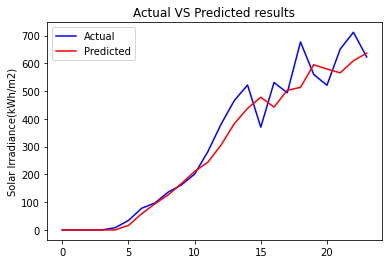

In [ ]:
# result presenting part
plt.plot(actual[:24], label='Actual', color="blue")
plt.plot(predicted[:24], label='Predicted', color="red")
plt.ylabel("Solar Irradiance(kWh/m2)")
plt.title("Actual VS Predicted results")
plt.legend()
plt.show()